# LAB 06 - LinePlot


## 02 데이터 분포 시각화 (1) - Boxplot, KDE


## 데이터 분포 시각화 종류

| 그래프 유형          | seaborn 함수                         | 설명 / 목적                     |
|----------------------|---------------------------------------|----------------------------------|
| 박스플롯             | `boxplot()`                           | 사분위수 기반 분포 요약         |
| KDE 곡선             | `kdeplot()`                           | 연속형 분포의 밀도              |
| 히스토그램           | `histplot()`                          | 연속형 변수의 분포 확인         |
| 히스토그램 + KDE     | `displot(kind="hist")` / `histplot(kde=True)` | 분포 + 패턴               |
| 바이올린 플롯        | `violinplot()`                        | 분포 + 중앙값 + 퍼짐             |
| 스트립플롯           | `stripplot()`                         | 분포의 개별 관측값               |
| 스웜플롯             | `swarmplot()`                         | 겹치지 않는 스트립(마커) 분포    |
| 히트맵               | `heatmap()`                            | 복수 변수의 밀도/상관 분석       |


### #01.준비작업
#### 1-1 라이브러리 참조

In [2]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np

#### 1-2 그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'

#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)

#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)

#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#글꼴 이름 확인
font_name

'Noto Sans KR'

In [4]:
#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 200

#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'

#그림 스타일 지정
my_theme = 'dark'

#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)


#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [5]:
origin = load_data('employee_data_40')
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


### #02.Boxplot
1. 연속형 데이터의 분포를 사분위수 기반으로 확인
   - list,ndarray,Series 등 모든 연속형 객체를 data 파라미터에 지정한다
   - orient 로 방향을 설정할 수 있다 (v - 세로 / h - 가로)

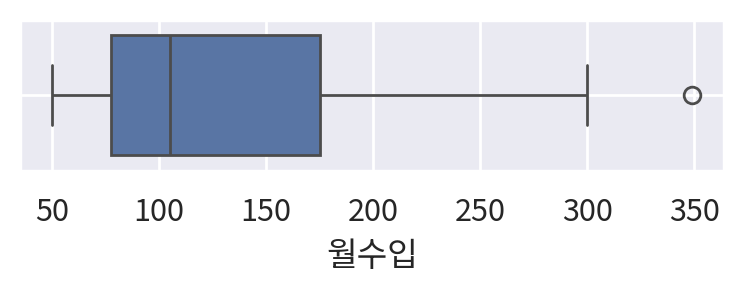

In [7]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=800            #그래프 가로 크기
height_px = 350         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)

#그래프의 도화지 상태 확인용 테스트 코드
# print(ax)

#2) 그래프 그리기 > seaborn 사용
sb.boxplot(data=origin['월수입'],orient='h')


#3) 그래프 꾸미기 > 도화지 ax 에 직접 적용
ax.grid(True)

#4) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

2. 데이터 프레임을 통한 상자 그림
   - data 파라미터에 데이터 프레임을 설정하고, y 파라미터에 표시하고자 하는 변수 이름을 문자열로 설정한다
   - x파라미터에 설정할 경우 가로 상자그림으로 표시된다

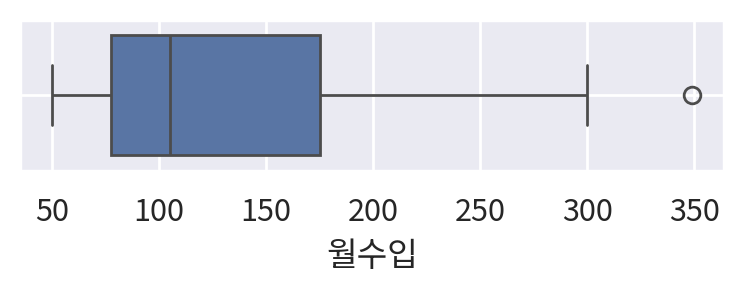

In [8]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=800            #그래프 가로 크기
height_px = 350         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)

#그래프의 도화지 상태 확인용 테스트 코드
# print(ax)

#2) 그래프 그리기 > seaborn 사용
sb.boxplot(data=origin , x='월수입')


#3) 그래프 꾸미기 > 도화지 ax 에 직접 적용
ax.grid(True)

#4) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

3. 복수 변수에 대한 처리
   - 표시하고자 하는 변수를 필터링하여 data 파라미터에 설정한다

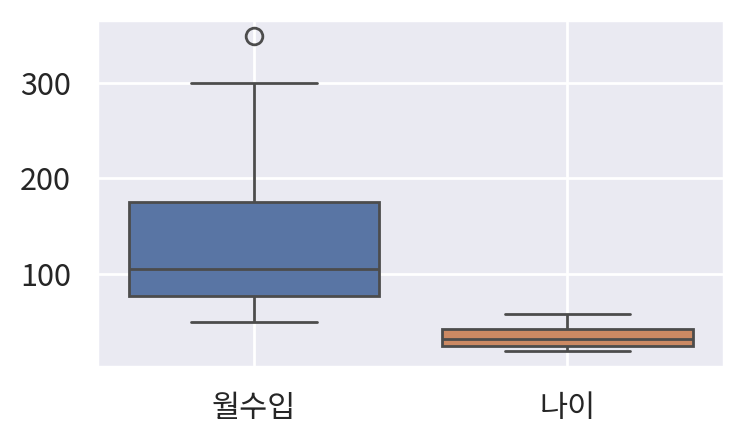

In [9]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=800            #그래프 가로 크기
height_px = 500         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)

#그래프의 도화지 상태 확인용 테스트 코드
# print(ax)

#2) 그래프 그리기 > seaborn 사용
sb.boxplot(data=origin[['월수입','나이']])


#3) 그래프 꾸미기 > 도화지 ax 에 직접 적용
ax.grid(True)

#4) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### #03.KDE 커널 밀도 추천 Plot
- 연속형 데이터의 분포를 부드러운 곡선 형태로 추정하는 비모수적 방법
- 데이터의 전체적인 분포 모양, 봉우리, 꼬리 등을 확인하는 데 유용함

<비모수적 방법>
- 데이터가 정규분포일 것이다 같은 가정이 없음
- 대신 데이터 자체를 기반으로 분포의 모양을 추정함
- 필요한 것은 파라미터 보다 데이터의 구조와 패턴

#### #03-1 연속성 데이터 설정

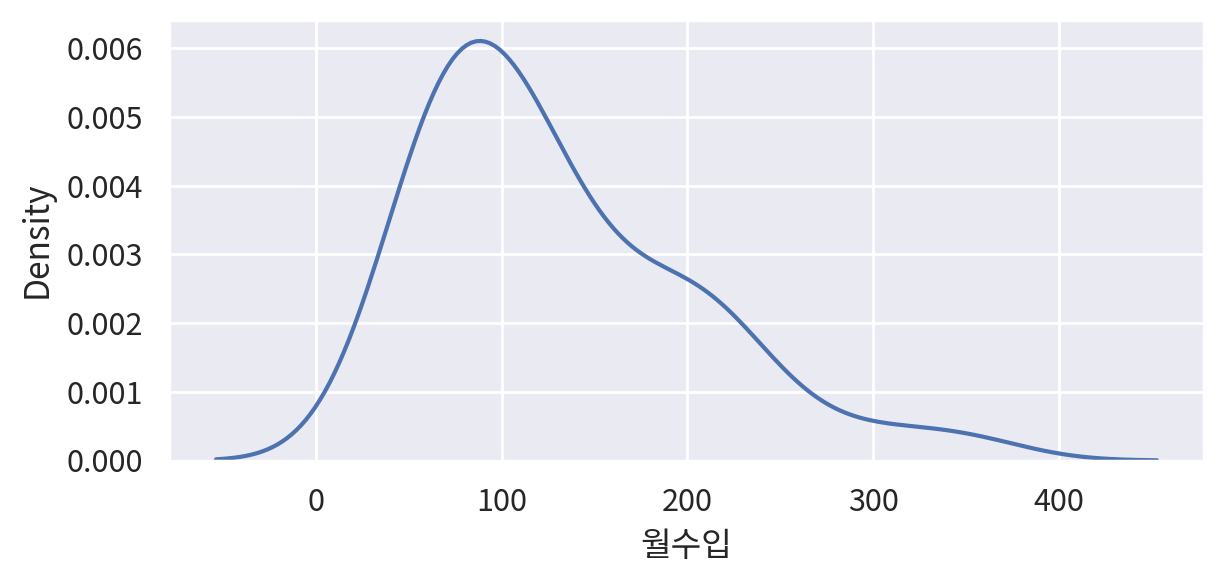

In [10]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.kdeplot(data=origin['월수입'])
ax.grid(True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### #03-2 데이터 프레임 자체를 적용하기

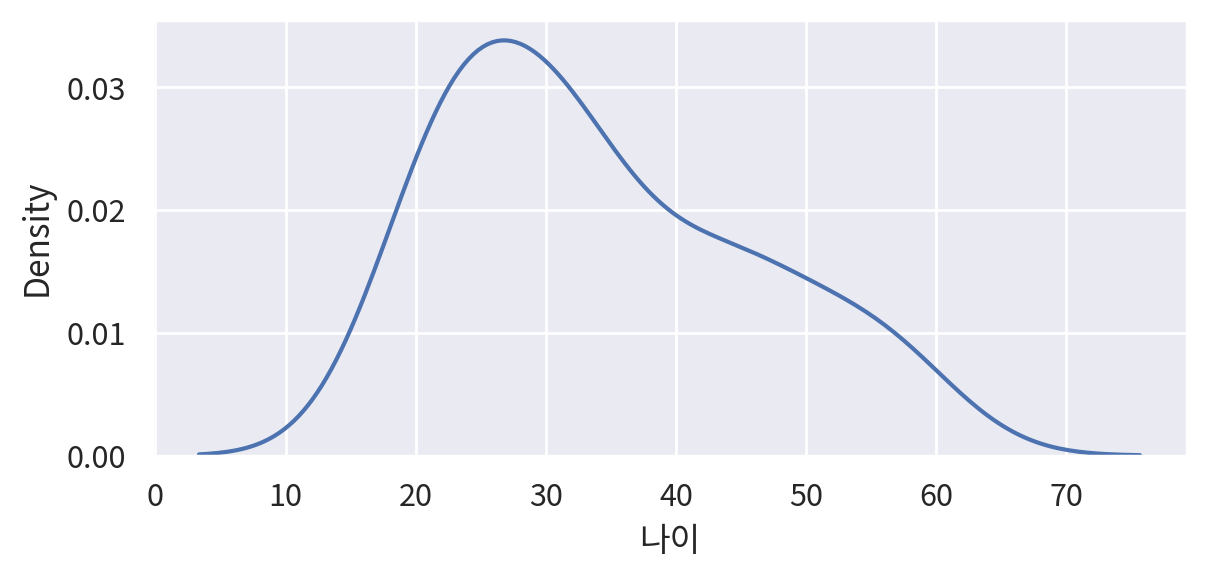

In [11]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.kdeplot(data=origin,x='나이')
ax.grid(True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### #03-3 다중 분포
- 데이터프레임을 data 파라미터에 적용하면서 x 나 y 파라미터를 지정핮 않으면 모든 연속형 변수에 대한 커널 밀도 곡선이 표현된다

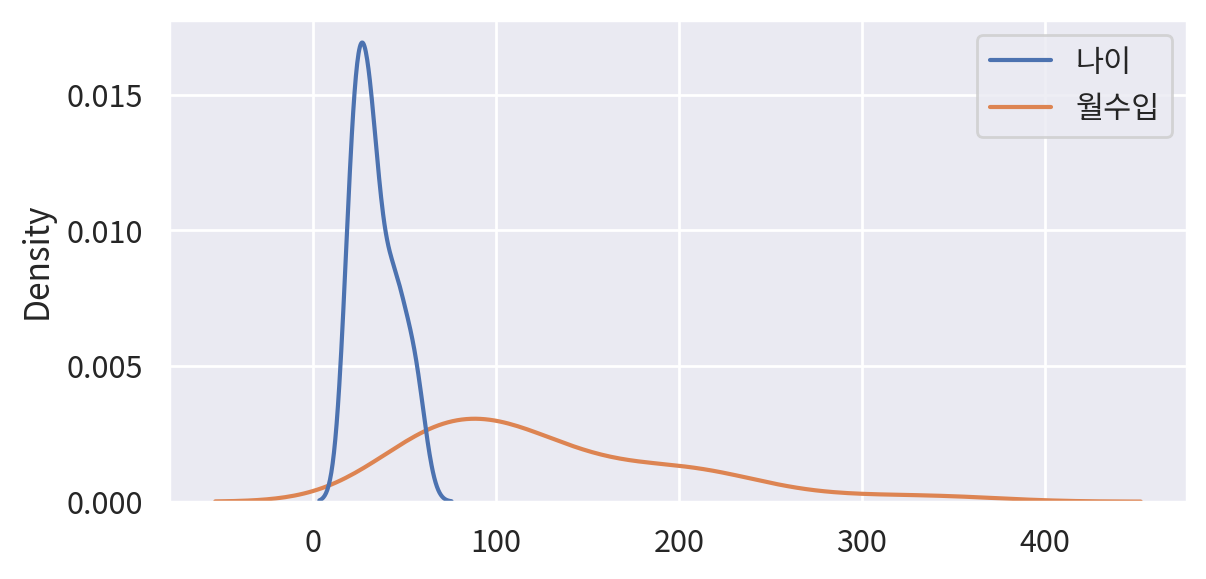

In [12]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.kdeplot(data=origin)
ax.grid(True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### #03-4 색상 채우기
- fill=True 파라미터를 설정하면 곡선 내부에 색상이 표시된다
- 이떄 alpha 파라미터를 0~1 사이의 값으로 설정하여 면의 투명도를 조절할 수 있다

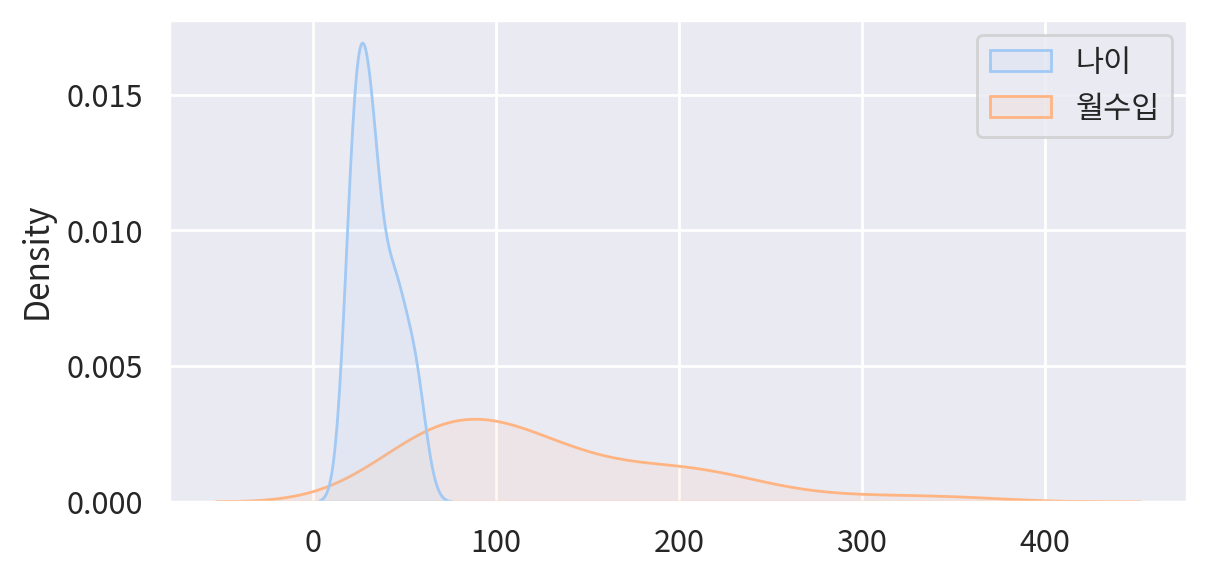

In [13]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.kdeplot(data=origin,fill=True,alpha=0.1,palette='pastel')
ax.grid(True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### #03-5 범주에 따른 구분
- hue 파라미터에 명목형 변수의 이름을 지정하면 범주에 따라 그래프를 분기한다

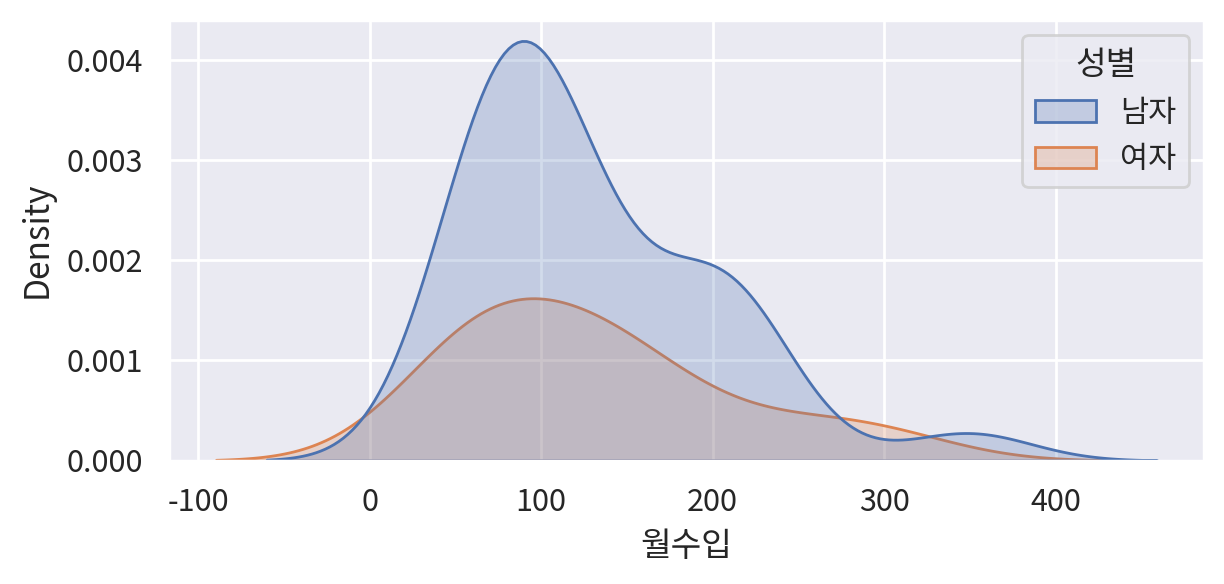

In [15]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.kdeplot(data=origin,x='월수입',hue='성별',fill=True)
ax.grid(True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### 04.Histogram
- 도수분포표를 시각화 한 그래프
#### 4-1 구간 수 지정하기

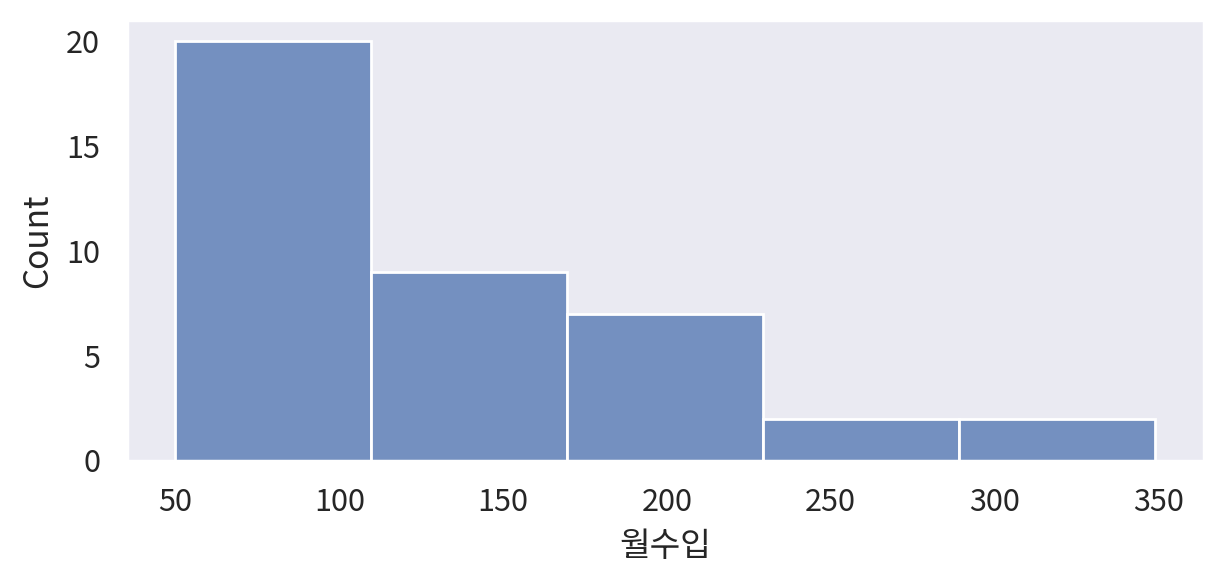

In [18]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=origin['월수입'],bins=5)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 4-2 구간을 표시하기

In [20]:
hist,bins = np.histogram(origin['월수입'],bins=5)
print(hist)
print(bins)

[20  9  7  2  2]
[ 50.  109.8 169.6 229.4 289.2 349. ]


In [21]:
bins = bins.round().astype('int')
bins

array([ 50, 110, 170, 229, 289, 349])

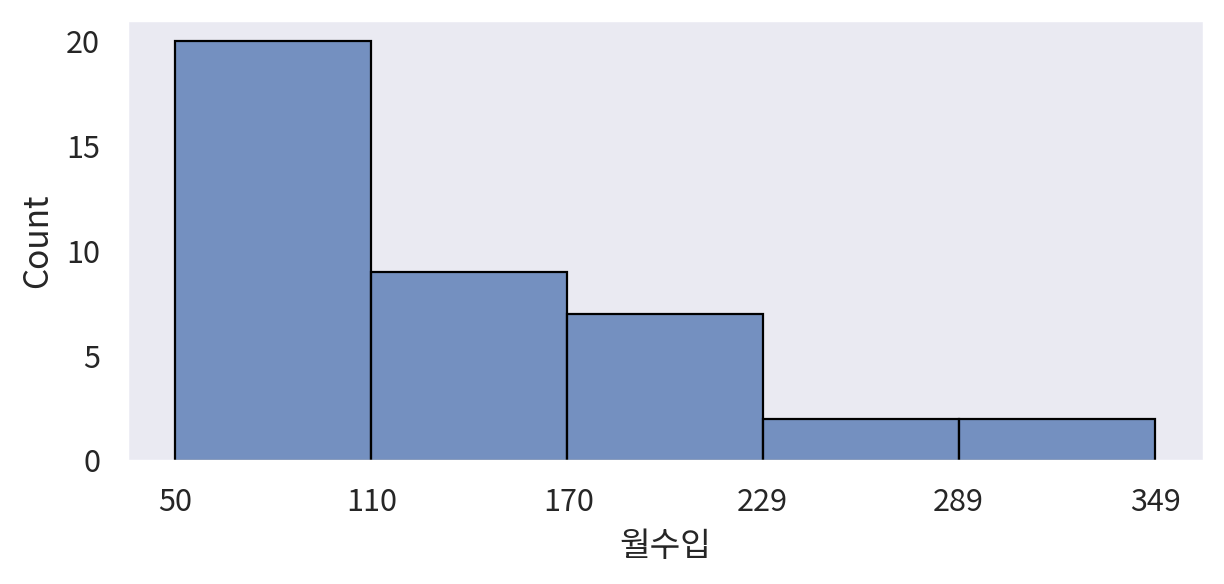

In [23]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=origin['월수입'],bins=5,edgecolor='#000000',linewidth = 0.8)
ax.set_xticks(bins,bins)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 4-3 구간을 직접 지정하기
- bins 파라미터에 구간을 의미하는 리스트를 지정한다

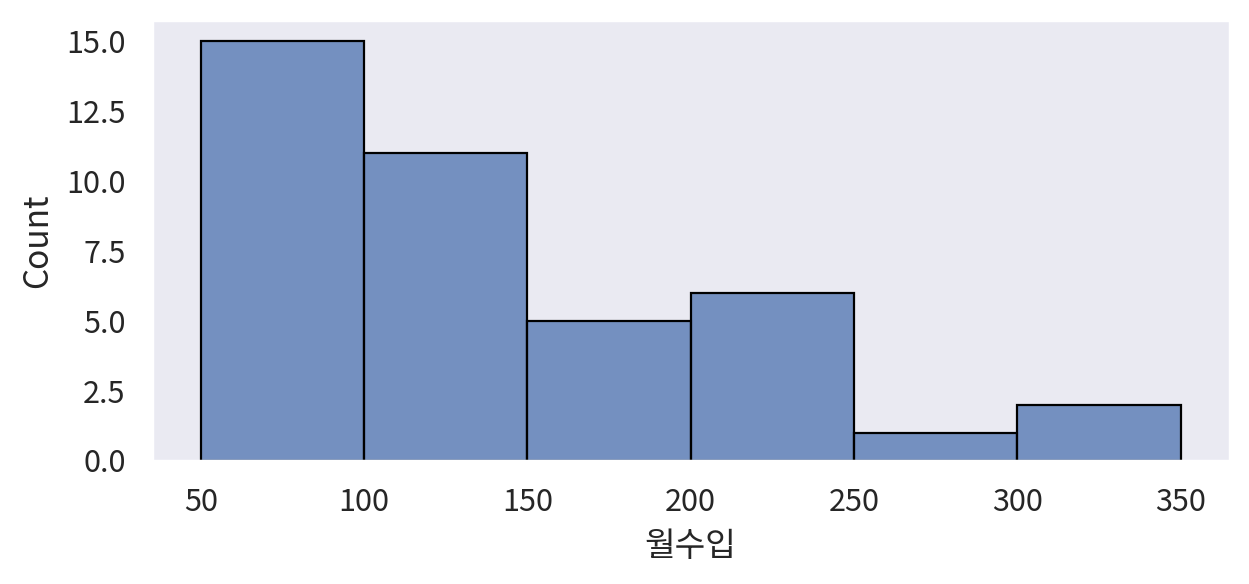

In [24]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=origin['월수입'],bins=[50,100,150,200,250,300,350],edgecolor = '#000000',linewidth=0.8)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 4-4 범주에 따른 구분
- bins 파라미터에 구간을 의미하는 리스트를 지정한다

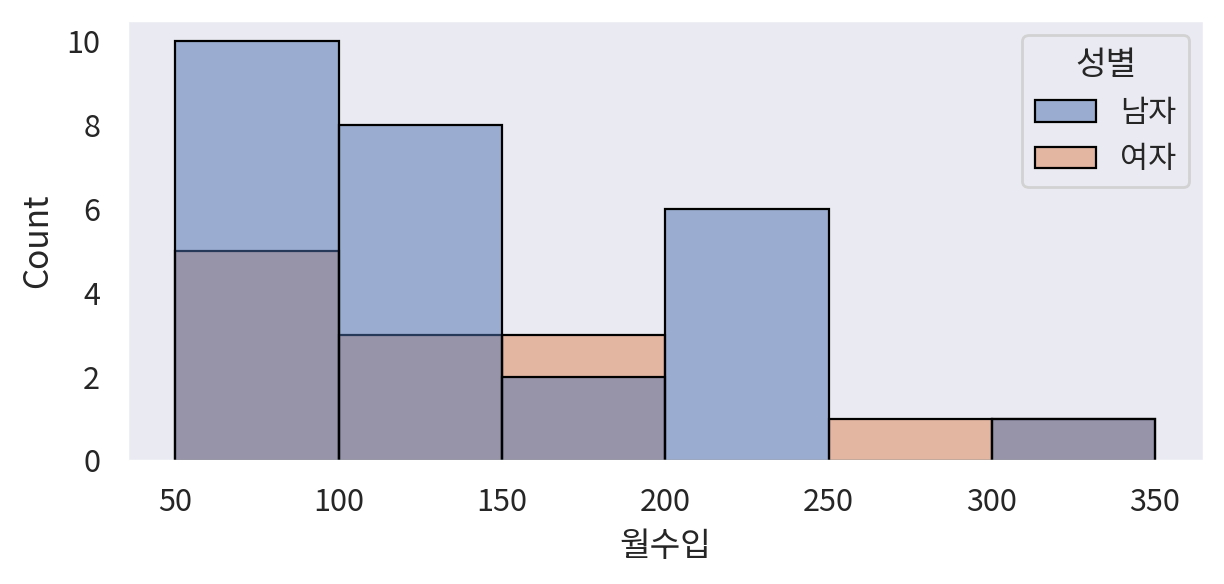

In [26]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=origin,x='월수입',hue='성별',bins=[50,100,150,200,250,300,350],edgecolor = '#000000',linewidth=0.8)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 4-5 히스토그램의 계급의 수와 간격의 크기
우리가 사용하는 데이터는 종류도 다양하며 관측치의 개수도 다양하다.  
또한 데이터의 최소값과 최대값도 다양하다.  
따라서 히스토그램을 그릴 때 **계급의 개수(bins)** 와 **계급 간격(width)** 을 설정하는 것이 중요하다.

---

## (1) 계급의 수를 구하는 방법

### 📌 스터지스(Sturges)의 공식

히스토그램의 계급 수를 결정하는 대표 공식:

\[
\text{계급구간수} = 1 + 3.3\log n
\]

- \( n = \) 관측치의 수

---

### 📌 관측치 수에 따른 권장 계급 수 (일반적 기준)

| 관측치의 수 | 계급구간의 수 |
|-------------|----------------|
| 50 미만      | 5 ~ 7          |
| 50 ~ 200     | 7 ~ 9          |
| 200 ~ 500    | 9 ~ 10         |
| 500 ~ 1,000  | 10 ~ 11        |
| 1,000 ~ 5,000 | 11 ~ 13        |
| 5,000 ~ 50,000 | 13 ~ 17       |
| 50,000 초과  | 17 ~ 20        |

---

## (2) 간격(bin width)을 구하는 방법

계급구간의 간격 계산 공식:

\[
\text{계급간격} = \frac{\text{관측치 최대값 - 최소값}}{\text{계급구간의 수}}
\]

### 📌 주의할 점
- 첫 번째 계급구간은 반드시 **최소 관측치를 포함**해야 한다.
- 계급 시작점을 어떻게 잡는지가 중요하다.

---

## (3) 히스토그램의 모습

### 📌 대칭성

중앙 부분에 선을 수직으로 긋고 절반으로 접었을 때  
대칭에 가깝게 나타나는 형태를 **종모양(벨 형태, bell-shaped)** 이라고 한다.  

이 모양은 정규분포와 밀접하게 관련되어 있기 때문에  
히스토그램 분석에서 중요한 특징이라 할 수 있다.


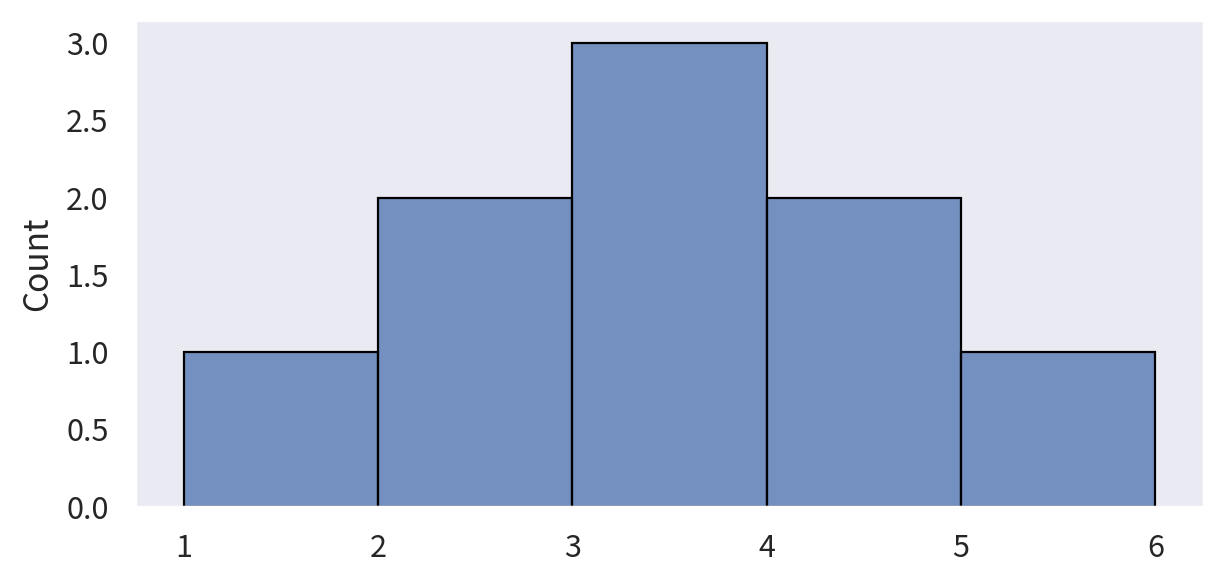

In [27]:
mybins = [1,2,3,4,5,6]
data = [1,2,2,3,3,3,4,4,5]

#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(1,1,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=data,bins=mybins,edgecolor='#000000',linewidth=0.8)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

## 비대칭성(Skewness)

그래프의 모양을 보면 값이 점점 작아지는 방향이 존재할 수 있는데,  
이 감소하는 방향을 **꼬리(tail)** 라고 부른다.

- 꼬리가 **양의 방향(오른쪽)** 으로 길면 → **양의 비대칭(우측 꼬리)**  
- 꼬리가 **음의 방향(왼쪽)** 으로 길면 → **음의 비대칭(좌측 꼬리)**

따라서 꼬리의 방향을 보면 히스토그램의 비대칭성을 판단할 수 있다.

### 📌 평균(mean)과 중앙값(median)의 관계
- **양의 비대칭(오른쪽 꼬리)**  
  → 평균이 중앙값보다 **크다**  
- **음의 비대칭(왼쪽 꼬리)**  
  → 평균이 중앙값보다 **작다**

아래 그림은 양의 비대칭과 음의 비대칭 히스토그램의 예시를 보여준다.


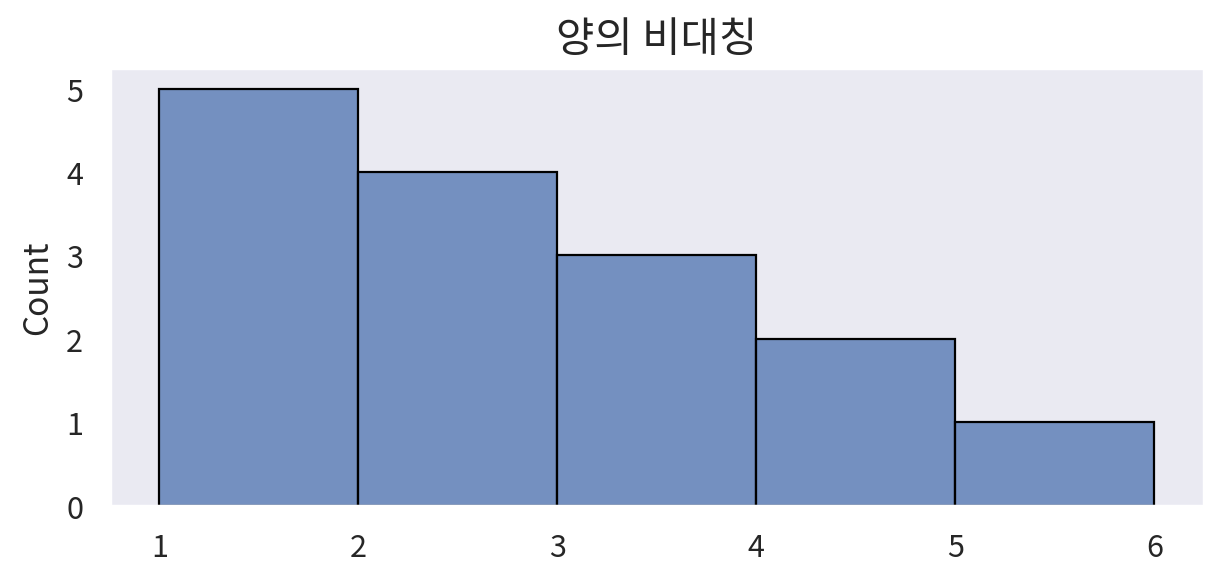

In [30]:
mybins = [1,2,3,4,5,6]
data = [1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]

#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(1,1,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=data,bins=mybins,edgecolor='#000000',linewidth=0.8)
ax.set_title("양의 비대칭", fontsize=15)
#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

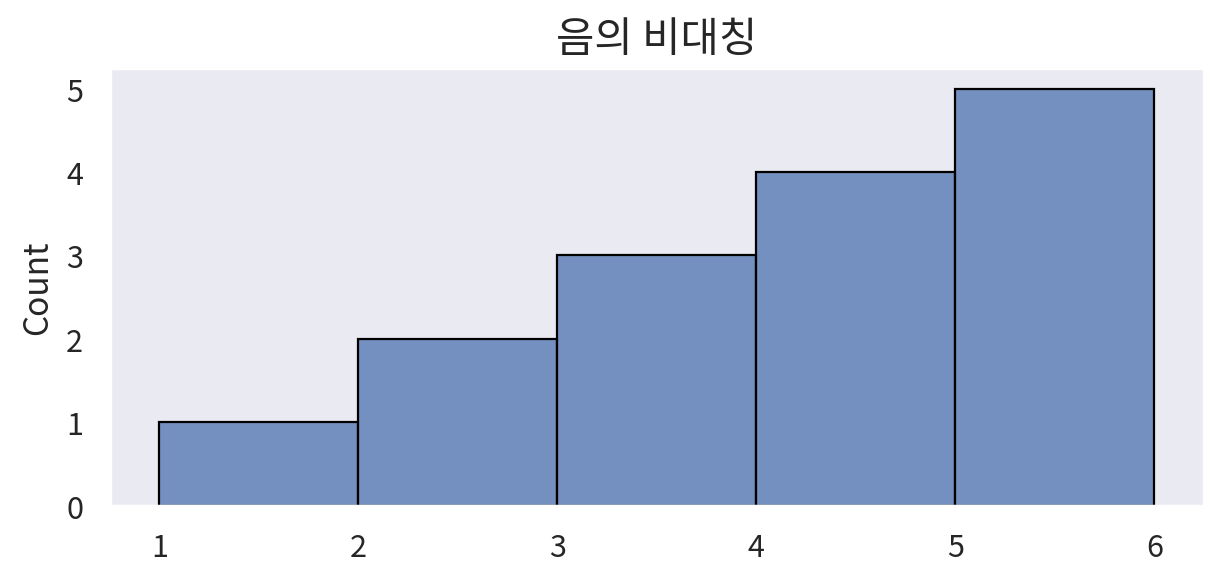

In [31]:
mybins = [1,2,3,4,5,6]
data =  [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(1,1,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=data,bins=mybins,edgecolor='#000000',linewidth=0.8)
ax.set_title("음의 비대칭", fontsize=15)
#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

## 봉우리 계급 구간의 수

히스토그램에서 가장 높은 도수를 가지는 값을 **최빈값(mode)** 이라고 한다.  
그리고 최빈값이 포함된 계급을 **최빈계급(mode class)** 이라고 부른다.

- **최빈계급이 하나**라면 → **단봉 히스토그램(unimodal)**  
- **최빈계급이 두 개**라면 → **양봉 히스토그램(bimodal)**  
- (참고: 세 개 이상인 경우는 다봉(multimodal) 구조라고도 한다.)

따라서 히스토그램의 봉우리 개수는 데이터의 구조를 파악하는 데 중요한 역할을 한다.


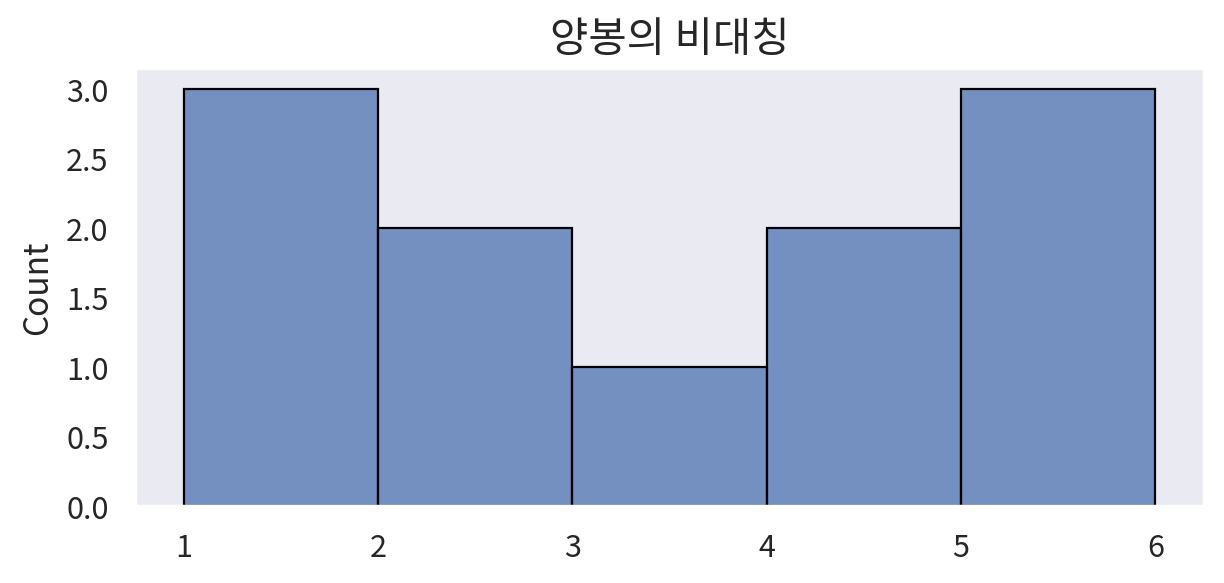

In [ ]:
mybins = [1,2,3,4,5,6]
data =  [1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 5]

#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(1,1,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=data,bins=mybins,edgecolor='#000000',linewidth=0.8)
ax.set_title("양봉 히스토그램", fontsize=15)
#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료